<a href="https://colab.research.google.com/github/MahdiTheGreat/LifeExpectancy/blob/main/life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupShuffleSplit
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr

In [2]:
!git clone https://github.com/MahdiTheGreat/LifeExpectancy.git
%cd LifeExpectancy

Cloning into 'LifeExpectancy'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 44 (delta 18), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 9.36 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/LifeExpectancy


In [3]:
df = pd.read_csv('life_expectancy.csv')

# Data analysis and exploration

In [4]:
# Helper function to analyse the data
def data_explorer(df,max_columns=60,max_rows = 20, display_func=display):
  if not isinstance(df, pd.DataFrame):df=pd.DataFrame(df)

  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)

  break_line="------------------------------------------------"

  print('data sample:')
  display_func(df)
  print(break_line)

  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)
  print('data info:')
  display_func(df.info())
  print(break_line)

  # Check the general structure of the dataset
  print('data description:')
  display_func(df.describe())

  print(break_line)

  print('data nan check:')
  display_func(df.isna().sum())
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)

In [5]:
data_explorer(df)

data sample:


,Country,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)","Population with at least some secondary education, female (% ages 25 and older)","Expected Years of Schooling, female (years)","Adolescent Birth Rate (births per 1,000 women ages 15-19)",Material footprint per capita (tonnes),"Mean Years of Schooling, male (years)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)",Inequality in eduation,Gender Development Index (value),Coefficient of human inequality,"Labour force participation rate, male (% ages 15 and older)",Human Development Index (value),Gross National Income Per Capita (2017 PPP$),"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Change (thousands),Population Growth Rate (percentage),Population Annual Doubling Time (years),Births (thousands),Births by women aged 15 to 19 (thousands),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Afghanistan,1990,0.342503,NaN,0.971125,NaN,0.209727,3.939093,2.504050,15.180,0.700485,1.970663,142.960,2.33,1.311020,5.419459,NaN,NaN,0.595,NaN,77.430,0.273,2684.550019,10845.924,10694.796,5348.387,5346.409,16.4714,100.0370,15.0917,363.742,32.974,-302.256,-2.826,NaN,567.256,83.530,51.423,7.5646,2.5937,29.880,105.5,203.514,110.102,93.412,18.449,45.9672,519.005,-666.001,-60.375
1,Afghanistan,1991,0.371860,NaN,1.019356,NaN,0.182525,4.171640,2.806550,15.214,0.772361,2.096679,147.525,2.28,1.385486,5.583395,NaN,NaN,0.588,NaN,77.176,0.279,2276.289409,10543.668,10745.167,5372.960,5372.208,16.5489,100.0140,15.0222,363.079,33.842,402.998,3.751,18.4790,555.610,83.643,51.788,7.6056,2.6403,29.812,105.6,192.531,104.274,88.257,17.946,46.6631,509.662,39.926,3.721
2,Afghanistan,1992,0.401218,NaN,1.067586,NaN,0.095233,4.417915,3.109050,15.223,0.844236,2.230753,147.521,2.35,1.459952,5.747332,NaN,NaN,0.586,NaN,76.871,0.287,2059.868084,10946.666,12057.433,6028.494,6028.938,18.5700,99.9926,14.9471,386.978,34.726,2221.534,18.477,3.7514,578.891,86.564,51.948,7.6648,2.7108,29.885,105.6,191.913,104.633,87.280,17.222,47.5955,532.989,1834.556,164.629
3,Afghanistan,1993,0.430575,NaN,1.115817,NaN,0.084285,4.678730,3.411550,15.197,0.916112,2.373401,147.896,2.10,1.534418,5.911269,NaN,NaN,0.548,NaN,76.580,0.297,1525.533426,13168.200,14003.760,7003.641,7000.119,21.5676,100.0503,14.8736,499.304,37.200,1671.120,11.948,5.8014,698.469,103.981,52.038,7.7186,2.8254,29.948,105.6,199.165,104.343,94.822,14.838,51.4664,646.635,1171.818,87.304
4,Afghanistan,1994,0.459933,NaN,1.164047,NaN,0.075054,4.954942,3.714050,15.178,0.987988,2.525171,155.669,1.83,1.608884,6.075205,NaN,NaN,0.524,NaN,76.330,0.292,1087.961890,14839.320,15455.554,7733.458,7722.096,23.8036,100.1471,14.7845,567.068,37.485,1232.469,7.979,8.6871,789.282,122.455,52.174,7.7165,2.8630,29.789,105.7,222.214,119.122,103.092,14.689,51.

------------------------------------------------
data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 50 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country                                                                          5553 non-null   object 
 1   Year                                                                             5553 non-null   int64  
 2   Mean Years of Schooling, female (years)                                          5272 non-null   float64
 3   Share of seats in parliament, male (% held by men)                               5263 non-null   float64
 4   Mean Years of Schooling (years)                                                  5553 non-null   float64
 5   Inequality in income                                      

None

------------------------------------------------
data description:


,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)","Population with at least some secondary education, female (% ages 25 and older)","Expected Years of Schooling, female (years)","Adolescent Birth Rate (births per 1,000 women ages 15-19)",Material footprint per capita (tonnes),"Mean Years of Schooling, male (years)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)",Inequality in eduation,Gender Development Index (value),Coefficient of human inequality,"Labour force participation rate, male (% ages 15 and older)",Human Development Index (value),Gross National Income Per Capita (2017 PPP$),"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Change (thousands),Population Growth Rate (percentage),Population Annual Doubling Time (years),Births (thousands),Births by women aged 15 to 19 (thousands),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
count,5553.000000,5272.000000,5263.000000,5553.000000,1805.000000,5548.000000,5194.000000,5553.000000,5300.000000,5185.000000,5194.000000,5553.000000,4679.000000,5272.000000,5186.000000,5263.000000,1965.000000,4876.000000,1725.000000,5300.000000,5553.000000,5553.000000,5.553000e+03,5.553000e+03,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,4065.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000
mean,2006.407527,7.329082,83.226805,7.721285,23.413150,4.794938,12.246778,12.144108,50.240731,50.650944,12.225777,57.879278,15.160598,8.158566,56.778109,16.773195,18.944789,0.921398,19.269627,73.019821,0.669951,17373.287175,3.688237e+04,3.711360e+04,18667.076175,18446.524237,207.971428,101.007395,26.125438,461.571950,14.438580,462.452656,1.413137,47.154752,760.079901,88.753454,23.039611,3.050318,1.336000,28.776684,105.227120,298.507951,159.879669,138.628290,8.601031,69.055750,734.789664,0.880036,-0.185379
std,9.032749,3.579831,11.072464,3.271488,10.050090,6.548047,3.015263,3.330159,16.199127,29.948429,3.828967,45.696337,15.079047,3.068543,27.405447,11.072464,14.472672,0.082859,10.042396,8.843259,0.164806,19573.539080,1.358659e+05,1.365579e+05,69976.449544,66595.771494,717.008827,17.707363,8.544969,1625.736829,11.024385,1595.065756,1.947928,27.812510,2562.598938,327.118342,11.378031,1.598479,0.593845,1.549604,2.361906,1009.808119,549.178773,461.495123,3.486491,9.200514,2467.630772,192.239758,15.734229
min,1990.000000,0.100000,42.452830,0.290000,5.845034,0.015895,2.633210,2.059570,5.995000,0.420000,1.420440,1.493000,0.260000,0.500000,2.050000,0.000000,0.550110,0.485000,4.352563,40.590000,0.216000,416.032660,9.098000e+00,9.182000e+00,4.410000,4.773000,1.387800,81.884600,13.528

------------------------------------------------
data nan check:


,0
Country,0
Year,0
"Mean Years of Schooling, female (years)",281
"Share of seats in parliament, male (% held by men)",290
Mean Years of Schooling (years),0
Inequality in income,3748
Carbon dioxide emissions per capita (production) (tonnes),5
"Expected Years of Schooling, male (years)",359
Expected Years of Schooling (years),0
"Labour force participation rate, female (% ages 15 and older)",253


In [6]:
# Helper function to plot histograms for the data
def data_histogram(df,figsize=(10, 15),histogram_fig_col=None,gridspec_kw={'wspace': 0.1, 'hspace': 0.1}):
   # Select numeric columns (integer and float types)
   numeric_columns = df.select_dtypes(include=['number']).columns

   # Calculate the square root of the number of plots to find the closest square layout
   if histogram_fig_col is None:
    cols = int(math.sqrt(len(numeric_columns)))
   else:
    cols = histogram_fig_col
   rows = len(numeric_columns) // cols + (len(numeric_columns) % cols > 0)

   fig, axes = plt.subplots(rows, cols, figsize=figsize,constrained_layout=True,gridspec_kw=gridspec_kw)
   fig_width, fig_height = fig.get_size_inches()

   # Flatten the axes array for easy iteration
   axes = axes.flatten()

   # Plotting each attribute in the grid
   for i, column in enumerate(numeric_columns):
        sns.histplot(df[column], kde=True, ax=axes[i])

   # Remove any unused subplots
   for j in range(i + 1, len(axes)):
       fig.delaxes(axes[j])

   axes.reshape(rows, cols)
   plt.show()

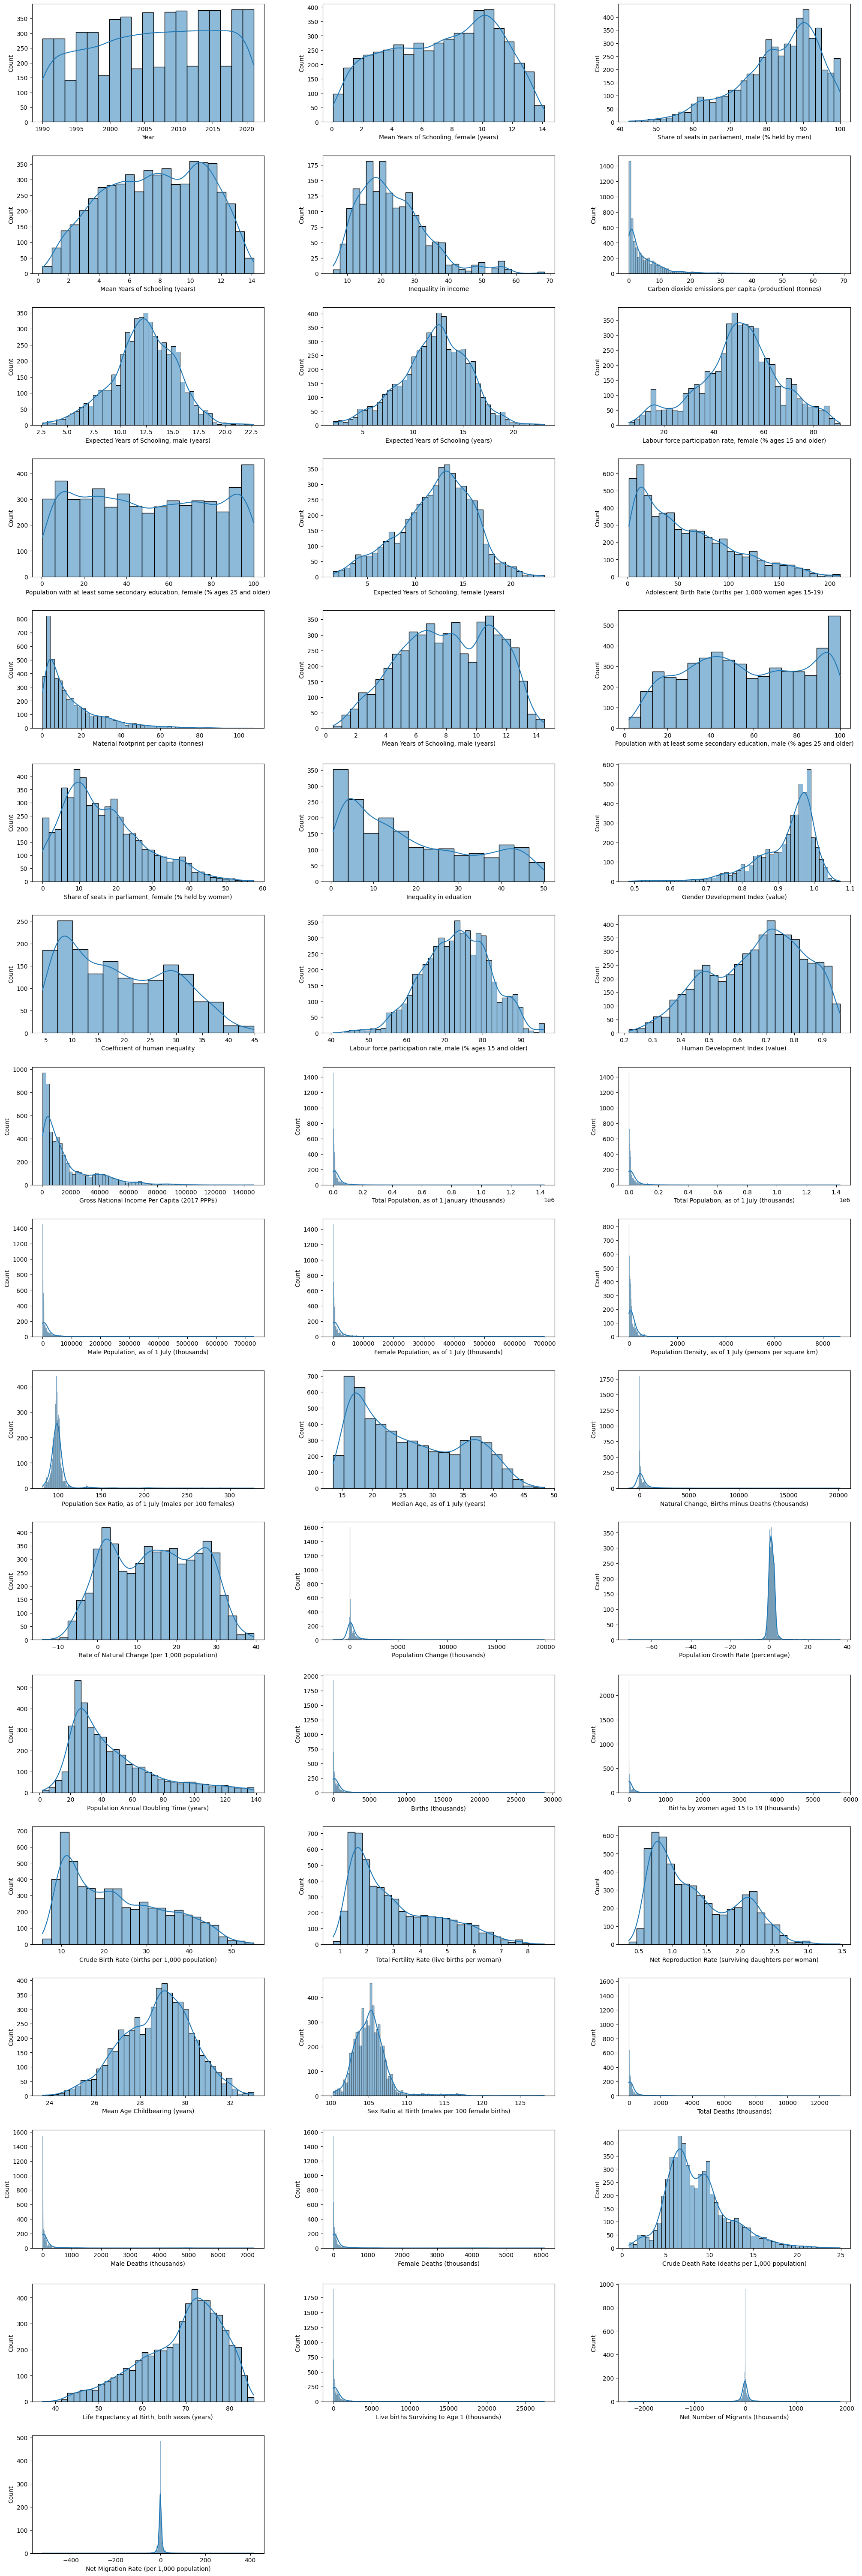

In [7]:
data_histogram(df,figsize=(20, 60),histogram_fig_col=3)

In [8]:
df.columns = df.columns.str.lower()

# Dictionary mapping old column names to new column names for better habdnling the data
column_rename_dict = {
    'country': 'country',
    'year': 'year',
    'mean years of schooling, female (years)': 'mean_years_of_schooling_female',
    'share of seats in parliament, male (% held by men)': 'share_of_male_seats_in_parliament',
    'mean years of schooling (years)': 'mean_years_of_schooling',
    'inequality in income': 'income_inequality',
    'carbon dioxide emissions per capita (production) (tonnes)': 'co2_emissions_per_capita_tonnes',
    'expected years of schooling, male (years)': 'expected_years_of_schooling_male',
    'expected years of schooling (years)': 'expected_years_of_schooling',
    'labour force participation rate, female (% ages 15 and older)': 'female_labour_force_participation_rate',
    'population with at least some secondary education, female (% ages 25 and older)': 'female_population_with_some_secondary_education',
    'expected years of schooling, female (years)': 'expected_years_of_schooling_female',
    'adolescent birth rate (births per 1,000 women ages 15-19)': 'adolescent_birth_rate_per_1000_women_ages_15_19',
    'material footprint per capita (tonnes)': 'material_footprint_per_capita_tonnes',
    'mean years of schooling, male (years)': 'mean_years_of_schooling_male',
    'population with at least some secondary education, male (% ages 25 and older)': 'male_population_with_some_secondary_education',
    'share of seats in parliament, female (% held by women)': 'share_of_female_seats_in_parliament',
    'inequality in eduation': 'education_inequality',
    'gender development index (value)': 'gender_development_index',
    'coefficient of human inequality': 'coefficient_of_human_inequality',
    'labour force participation rate, male (% ages 15 and older)': 'male_labour_force_participation_rate',
    'human development index (value)': 'human_development_index',
    'gross national income per capita (2017 ppp$)': 'gross_national_income_per_capita_2017_ppp',
    'total population, as of 1 january (thousands)': 'total_population_as_of_january_1st_thousands',
    'total population, as of 1 july (thousands)': 'total_population_as_of_july_1st_thousands',
    'male population, as of 1 july (thousands)': 'male_population_as_of_july_1st_thousands',
    'female population, as of 1 july (thousands)': 'female_population_as_of_july_1st_thousands',
    'population density, as of 1 july (persons per square km)': 'population_density_as_of_july_1st_persons_per_square_km',
    'population sex ratio, as of 1 july (males per 100 females)': 'population_sex_ratio_as_of_july_1st_males_per_100_females',
    'median age, as of 1 july (years)': 'median_age_as_of_july_1st_years',
    'natural change, births minus deaths (thousands)': 'natural_change_births_minus_deaths_thousands',
    'rate of natural change (per 1,000 population)': 'rate_of_natural_change_per_1000_population',
    'population change (thousands)': 'population_change_thousands',
    'population growth rate (percentage)': 'population_growth_rate_percentage',
    'population annual doubling time (years)': 'population_annual_doubling_time_years',
    'births (thousands)': 'births_thousands',
    'births by women aged 15 to 19 (thousands)': 'births_by_women_aged_15_to_19_thousands',
    'crude birth rate (births per 1,000 population)': 'crude_birth_rate_births_per_1000_population',
    'total fertility rate (live births per woman)': 'total_fertility_rate_live_births_per_woman',
    'net reproduction rate (surviving daughters per woman)': 'net_reproduction_rate_surviving_daughters_per_woman',
    'mean age childbearing (years)': 'mean_age_of_childbearing_years',
    'sex ratio at birth (males per 100 female births)': 'sex_ratio_at_birth_males_per_100_female_births',
    'total deaths (thousands)': 'total_deaths_thousands',
    'male deaths (thousands)': 'male_deaths_thousands',
    'female deaths (thousands)': 'female_deaths_thousands',
    'crude death rate (deaths per 1,000 population)': 'crude_death_rate_deaths_per_1000_population',
    'life expectancy at birth, both sexes (years)': 'life_expectancy_at_birth_both_sexes_years',
    'live births surviving to age 1 (thousands)': 'live_births_surviving_to_age_1_thousands',
    'net number of migrants (thousands)': 'net_number_of_migrants_thousands',
    'net migration rate (per 1,000 population)': 'net_migration_rate_per_1000_population'
}

In [9]:
df_new = df.copy()

# Rename columns using the mapping
df_new = df_new.rename(columns=column_rename_dict, errors='raise')

# Drop columns with more than 50% missing values
missing_percentage = df_new.isnull().mean() * 100
cols_to_drop = missing_percentage[missing_percentage > 50].index
df_new.drop(columns=cols_to_drop, inplace=True)

# Drop rows where the target variable is missing
df_new.dropna(subset=['life_expectancy_at_birth_both_sexes_years'], inplace=True)

# Label encode 'country' to 'country_id'
label_encoder = LabelEncoder()
df_new['country_id'] = label_encoder.fit_transform(df_new['country'])

# Define features and target
y_col = 'life_expectancy_at_birth_both_sexes_years'
x_col = [col for col in df_new.columns if col not in [y_col, 'country', 'country_id']]

X = df_new[x_col]
y = df_new[y_col]
groups = df_new['country_id']

# Perform group-wise train-test split
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train = X.iloc[train_idx].reset_index(drop=True)
X_test = X.iloc[test_idx].reset_index(drop=True)
y_train = y.iloc[train_idx].reset_index(drop=True)
y_test = y.iloc[test_idx].reset_index(drop=True)

# Impute missing values in numerical columns using the mean
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

# Problem 2

### a) Identifying the variable with the strongest linear relationship with LEB

In [10]:
# Concatenate X_train and y_train to form a complete training dataframe
df_train = pd.concat([X_train, y_train], axis=1)

# Compute the correlation matrix
corr_matrix = df_train.corr()

# Get the correlations with the target variable
target_correlations = corr_matrix['life_expectancy_at_birth_both_sexes_years'].drop('life_expectancy_at_birth_both_sexes_years')

# Find the variable with the highest absolute correlation with the target variable
max_corr_variable = target_correlations.abs().idxmax()
max_corr_value = target_correlations[max_corr_variable]

print(f"The variable with the strongest linear relationship with LEB is '{max_corr_variable}' with a Pearson correlation coefficient of {max_corr_value:.4f}")

The variable with the strongest linear relationship with LEB is 'human_development_index' with a Pearson correlation coefficient of 0.9188


### b) Constructing a Single-variable Linear Model

Intercept: 35.1351
Coefficient for 'human_development_index': 50.7742
Coefficient of Determination (R^2): 0.8442


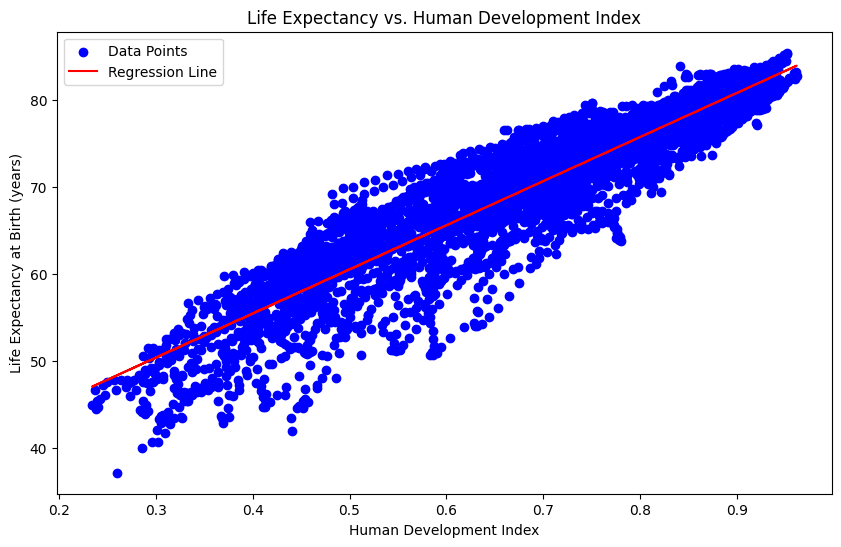

In [11]:
# Extract the variable and target from the training data
X_var_train = X_train[[max_corr_variable]]
y_train_values = y_train

# Fit the linear regression model
model = LinearRegression()
model.fit(X_var_train, y_train_values)

# Get the coefficients
intercept = model.intercept_
coefficient = model.coef_[0]
r_squared = model.score(X_var_train, y_train_values)

print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for '{max_corr_variable}': {coefficient:.4f}")
print(f"Coefficient of Determination (R^2): {r_squared:.4f}")

# Plotting the scatter plot with regression line
plt.figure(figsize=(10,6))
plt.scatter(X_var_train, y_train_values, color='blue', label='Data Points')
plt.plot(X_var_train, model.predict(X_var_train), color='red', label='Regression Line')
plt.xlabel(max_corr_variable.replace('_', ' ').title())
plt.ylabel('Life Expectancy at Birth (years)')
plt.title('Life Expectancy vs. ' + max_corr_variable.replace('_', ' ').title())
plt.legend()
plt.savefig("LEB_HDI.pdf", format='pdf')
plt.show()

### c) Evaluating the model on the test set

In [12]:
# Extract the predictor variable from the test set
X_var_test = X_test[[max_corr_variable]]
y_test_values = y_test

# Make predictions
y_pred = model.predict(X_var_test)

# Calculate the correlation between the predicted and actual LEB
correlation_matrix = np.corrcoef(y_pred, y_test_values)
correlation = correlation_matrix[0,1]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_values, y_pred)

print(f"Correlation between predicted and actual LEB: {correlation:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Correlation between predicted and actual LEB: 0.9205
Mean Squared Error (MSE): 15.2785


# Problem 3

In [13]:
# Get the correlation between different features
def correlation_heatmap(cm,figsize=(28,28),save_dir=None,name='Pearson Correlation of Features'):

    _ , ax = plt.subplots(figsize = figsize,constrained_layout=True)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        cm,
        cmap = colormap,
        square=True,
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
    )

    # Optionally, you can set the aspect ratio of the heatmap to make it more readable
    ax.set_aspect(aspect="auto")  # This adjusts the aspect ratio to fit the figure size
    plt.title(name, y=1.05, size=15)
    if save_dir:
      plt.savefig(save_dir, format='pdf')
    plt.show()

<ipython-input-13-7ec295ec8915>:19: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(save_dir, format='pdf')
<ipython-input-13-7ec295ec8915>:19: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(save_dir, format='pdf')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


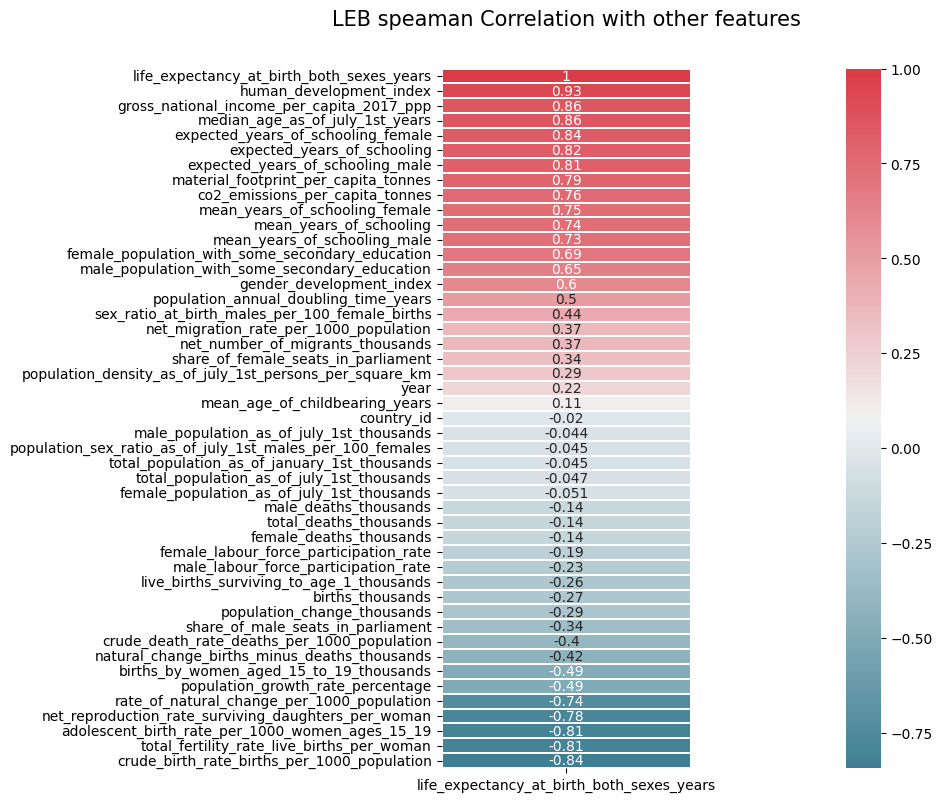

In [17]:
spearman_cm=df_new.corr(numeric_only=True,method='spearman')
leb='life_expectancy_at_birth_both_sexes_years'
correlation_heatmap(spearman_cm[[leb]].sort_values(ascending=False,by=leb),figsize=(5,10),name='LEB speaman Correlation with other features',save_dir='LEB_spearman_corr.pdf')


In [24]:
hdi='human_development_index'
max_spearman_corr_var=spearman_cm[leb].drop([leb,hdi]).abs().idxmax()
print(max_spearman_corr_var)

gross_national_income_per_capita_2017_ppp


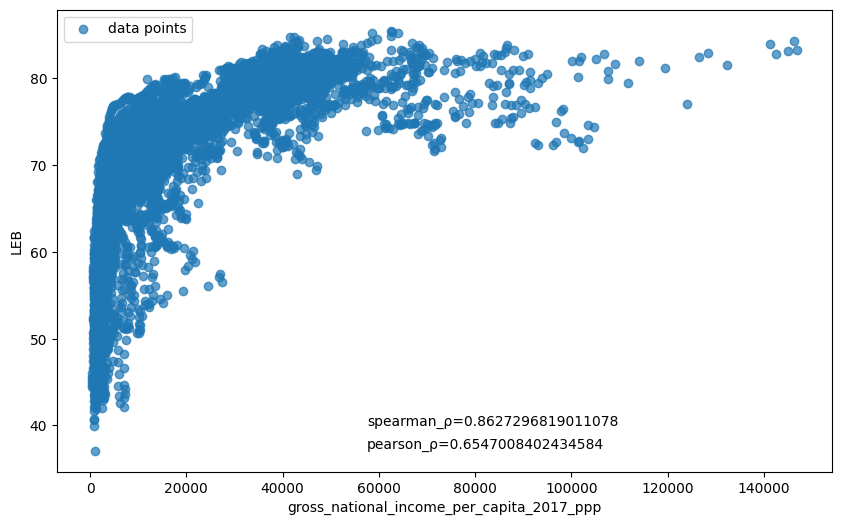

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df_new[max_spearman_corr_var], df_new[leb], alpha=0.7,label='data points')
plt.xlabel(max_spearman_corr_var)
plt.ylabel('LEB')
# Plot the regression line
s_correlation=spearman_cm[leb][max_spearman_corr_var]
pearson_cm=df_new.corr(numeric_only=True,method='pearson')
p_correlation=pearson_cm[leb][max_spearman_corr_var]
plt.annotate(f'spearman_ρ={s_correlation}',xy=(0.4,0.1),xycoords='axes fraction')
plt.annotate(f'pearson_ρ={p_correlation}',xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='best')
plt.savefig('LEB(GNI).pdf', format='pdf')
plt.show()

In [45]:
print(f'spearman_ρ={s_correlation}')
print(f'pearson_ρ={p_correlation}')

spearman_ρ=0.8627296819011078
pearson_ρ=0.6547008402434584


In [29]:
def find_best_transformation(X_var, y_var):
    transformations = {
        'original': X_var,
        'log': np.log(X_var + 1),     # Add 1 to avoid log(0)
        'sqrt': np.sqrt(X_var + 1),   # Add 1 to avoid sqrt(0)
        'inverse': 1 / (X_var + 1e-6), # Add small value to avoid division by zero
        'square': X_var ** 2,
        'cube': X_var ** 3,
    }
    results = []
    for name, transformed_var in transformations.items():
        # Remove infinite or NaN values
        mask = ~np.isinf(transformed_var) & ~np.isnan(transformed_var)
        transformed_var = transformed_var[mask]
        y_valid = y_var[mask]
        pearson_corr, _ = pearsonr(transformed_var, y_valid)
        results.append({'transformation': name, 'pearson_corr': pearson_corr})
    results_df = pd.DataFrame(results)
    return results_df

X_var = df_new[max_spearman_corr_var]
y_var = df_new[leb]

transformation_results = find_best_transformation(X_var, y_var)
transformation_results['abs_pearson_corr'] = transformation_results['pearson_corr'].abs()

# Display the results
print("Transformation Results:")
print(transformation_results)

Transformation Results:
  transformation  pearson_corr  abs_pearson_corr
0       original      0.654701          0.654701
1            log      0.834026          0.834026
2           sqrt      0.765254          0.765254
3        inverse     -0.740854          0.740854
4         square      0.436661          0.436661
5           cube      0.279109          0.279109


In [30]:
# Find the transformation with the highest absolute Pearson correlation
best_transformation = transformation_results.loc[transformation_results['abs_pearson_corr'].idxmax()]

print(f"Best Transformation: {best_transformation['transformation']}")
print(f"Pearson Correlation after Transformation: {best_transformation['pearson_corr']:.4f}")

Best Transformation: log
Pearson Correlation after Transformation: 0.8340


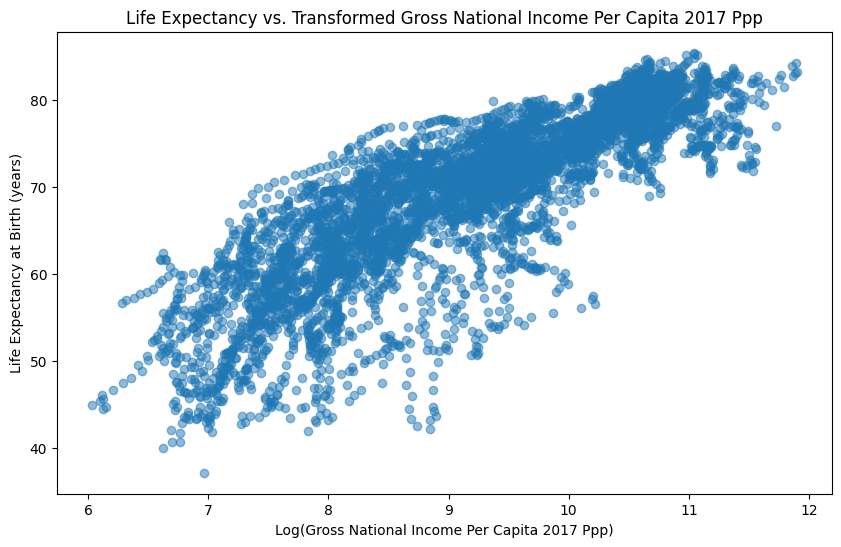

In [31]:
# Apply the best transformation
transformed_X_var = np.log(X_var + 1)

# Plot the transformed variable against the target
plt.figure(figsize=(10, 6))
plt.scatter(transformed_X_var, y_var, alpha=0.5)
plt.xlabel(f"{best_transformation['transformation'].title()}({max_spearman_corr_var.replace('_', ' ').title()})")
plt.ylabel('Life Expectancy at Birth (years)')
plt.title(f'Life Expectancy vs. Transformed {max_spearman_corr_var.replace("_", " ").title()}')
plt.savefig('births_leb_after.pdf', format='pdf')
plt.show()

# Problem 4

In [32]:
# Exclude the variable from Problem 2
variable_to_exclude = 'human_development_index'
X_train = X_train.drop(columns=[variable_to_exclude], errors='ignore')
X_test = X_test.drop(columns=[variable_to_exclude], errors='ignore')

# Include the transformed variable from Problem 3
transformed_variable = 'births_by_women_aged_15_to_19_thousands'
X_train['log_' + transformed_variable] = np.log(X_train[transformed_variable] + 1)
X_test['log_' + transformed_variable] = np.log(X_test[transformed_variable] + 1)


In [33]:
# Compute Pearson correlations between features and target
correlations = X_train.corrwith(y_train)

# Convert to dataframe for better visualization
correlations_df = correlations.to_frame().reset_index()
correlations_df.columns = ['feature', 'pearson_corr']
correlations_df['abs_corr'] = correlations_df['pearson_corr'].abs()

# Sort features by absolute correlation
correlations_df.sort_values(by='abs_corr', ascending=False, inplace=True)

# Display top features
print("Top features based on Pearson correlation with the target variable:")
print(correlations_df.head(10))


Top features based on Pearson correlation with the target variable:
                                              feature  pearson_corr  abs_corr
32        crude_birth_rate_births_per_1000_population     -0.865301  0.865301
33         total_fertility_rate_live_births_per_woman     -0.844886  0.844886
6                         expected_years_of_schooling      0.808683  0.808683
9                  expected_years_of_schooling_female      0.804915  0.804915
24                    median_age_as_of_july_1st_years      0.792664  0.792664
10    adolescent_birth_rate_per_1000_women_ages_15_19     -0.790072  0.790072
34  net_reproduction_rate_surviving_daughters_per_...     -0.780960  0.780960
5                    expected_years_of_schooling_male      0.769783  0.769783
3                             mean_years_of_schooling      0.739766  0.739766
1                      mean_years_of_schooling_female      0.737394  0.737394


In [34]:
from sklearn.model_selection import cross_val_score

# Initialize variables
best_features = []
remaining_features = [col for col in X_train.columns if col != 'country_id']
best_mse = float('inf')

while remaining_features:
    mse_with_features = []
    for feature in remaining_features:
        current_features = best_features + [feature]
        X = X_train[current_features]
        y = y_train
        model = LinearRegression()
        # Use 5-fold cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        mse = -scores.mean()
        mse_with_features.append((feature, mse))
    # Find feature with the lowest MSE
    feature, mse = min(mse_with_features, key=lambda x: x[1])
    if mse < best_mse:
        best_mse = mse
        best_features.append(feature)
        remaining_features.remove(feature)
        print(f"Added feature '{feature}' with MSE: {mse:.4f}")
    else:
        # Stop if no improvement
        break


Added feature 'crude_birth_rate_births_per_1000_population' with MSE: 20.7273
Added feature 'crude_death_rate_deaths_per_1000_population' with MSE: 10.7022
Added feature 'median_age_as_of_july_1st_years' with MSE: 4.2557
Added feature 'population_sex_ratio_as_of_july_1st_males_per_100_females' with MSE: 3.7174
Added feature 'net_reproduction_rate_surviving_daughters_per_woman' with MSE: 3.2625
Added feature 'year' with MSE: 3.1526
Added feature 'co2_emissions_per_capita_tonnes' with MSE: 2.9810
Added feature 'expected_years_of_schooling' with MSE: 2.8394
Added feature 'adolescent_birth_rate_per_1000_women_ages_15_19' with MSE: 2.7907
Added feature 'male_deaths_thousands' with MSE: 2.7704
Added feature 'female_labour_force_participation_rate' with MSE: 2.7529
Added feature 'population_density_as_of_july_1st_persons_per_square_km' with MSE: 2.7415
Added feature 'total_fertility_rate_live_births_per_woman' with MSE: 2.7290
Added feature 'expected_years_of_schooling_male' with MSE: 2.7252


In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
X = X_train[best_features]
y = y_train
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

print("\nSelected features after RFE:")
for feature in selected_features:
    print(f"- {feature}")


Selected features after RFE:
- crude_death_rate_deaths_per_1000_population
- median_age_as_of_july_1st_years
- net_reproduction_rate_surviving_daughters_per_woman


In [36]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = LinearRegression()
model.fit(X_train_selected, y_train)

# Training performance
r_squared = model.score(X_train_selected, y_train)
print(f"R² on Training Set: {r_squared:.4f}")

# Test performance
y_pred = model.predict(X_test_selected)
test_mse = mean_squared_error(y_test, y_pred)
test_correlation = np.corrcoef(y_test, y_pred)[0, 1]

print(f"Test Set MSE: {test_mse:.4f}")
print(f"Test Set Pearson Correlation: {test_correlation:.4f}")


R² on Training Set: 0.9511
Test Set MSE: 3.2690
Test Set Pearson Correlation: 0.9835
